In [165]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix 

my_dataset_new = pd.read_csv("My_Dataset_Update.csv")
my_dataset=my_dataset_new.copy()

my_dataset['Daily spent time in social media (hour)'].unique()
my_dataset['Daily spent time in social media (hour)']=my_dataset['Daily spent time in social media (hour)'].replace({'5/2/2019 0:00':''})

                                              

                                                 
my_dataset['How many people do you follow on social media?'].unique()
my_dataset['How many people do you follow on social media?']=my_dataset['How many people do you follow on social media?'].replace({'very few': '5', 
                                                                                             'Around 100':'100','100+': '100','few':'5','15+':'15','around 350':'350','2019-06-05 00:00:00':'0',
                                                                                                                                                 '2019-03-02 00:00:00':'0','2019-10-05 00:00:00':'0'
                                                                                                                                                 
                                                 
                                                 })
my_dataset['Typically your days are started at:'].unique()
my_dataset['Typically your days are started at:']=my_dataset['Typically your days are started at:'].replace({'LR': '11:00:00'
                                                                                             
                                                 
                                                 })

my_dataset=my_dataset.dropna()

my_dataset['Do you feel yourself depressed in a hostile situation?'] = my_dataset['Do you feel yourself depressed in a hostile situation?'].astype('category')
my_dataset['Do you feel yourself depressed in a hostile situation?'] = pd.factorize(my_dataset['Do you feel yourself depressed in a hostile situation?'])[0] + 1

my_dataset['Daily spent time in social media (hour)'] = pd.factorize(my_dataset['Daily spent time in social media (hour)'])[0] + 1
my_dataset['Do you feel low seeing other people\'s achievement on social media'] = pd.factorize(my_dataset['Do you feel low seeing other people\'s achievement on social media'])[0] + 1
my_dataset['Are you happy with current situation?'] = pd.factorize(my_dataset['Are you happy with current situation?'])[0] + 1
my_dataset['Do you feel confident when you start any project?'] = pd.factorize(my_dataset['Do you feel confident when you start any project?'])[0] + 1
my_dataset['Concerned about life (a) or goes too easy on life (b).'] = pd.factorize(my_dataset['Concerned about life (a) or goes too easy on life (b).'])[0] + 1

my_dataset.shape
#my_dataset=my_dataset.set_index('Daily spent time in social media (hour)')


(70, 10)

In [166]:
for i in range(len(my_dataset)):
    cgpa=float(my_dataset['CGPA'][i])
    if cgpa<= 4.0 and cgpa>= 3.5:
        my_dataset.loc[i,'CGPA'] = "3.5 - 4.0"
    elif cgpa < 3.5 and cgpa >= 3.0:
        my_dataset.loc[i,'CGPA']= "3.0 - 3.49"
    elif cgpa < 3.0 and cgpa >= 2.5:
        my_dataset.loc[i,'CGPA'] = "2.5 - 2.99"
    else:
        my_dataset.loc[i,'CGPA']= "below 2.5"
 


In [167]:
for i in range(len(my_dataset)):
    follower=int(my_dataset['How many people do you follow on social media?'][i])
    if follower <200:
         my_dataset.loc[i,'How many people do you follow on social media?']= "Less"
    else: 
         my_dataset.loc[i,'How many people do you follow on social media?']= "More" 

In [168]:
my_dataset['How many people do you follow on social media?'] = pd.factorize(my_dataset['How many people do you follow on social media?'])[0] + 1
my_dataset['CGPA'] = pd.factorize(my_dataset['CGPA'])[0] + 1


In [263]:
my_dataset.head()

,id,Typically your days are started at:,CGPA,Daily spent time in social media (hour),Are you happy with current situation?,Do you feel low seeing other people's achievement on social media,How many people do you follow on social media?,Concerned about life (a) or goes too easy on life (b).,Do you feel yourself depressed in a hostile situation?,Do you feel confident when you start any project?
0,151340982,11:00:00,1,1,1,1,1,1,1,1
1,151340985,11:00:00,1,2,2,2,1,1,2,1
2,151340990,11:00:00,1,1,2,1,1,2,1,2
3,151340994,11:00:00,1,3,3,2,1,1,2,2
4,151340894,08:00:00,2,1,2,1,1,2,3,2


Accuracy with 5 neighbours:  61.904761904761905
[[13  0  0]
 [ 3  0  0]
 [ 5  0  0]]


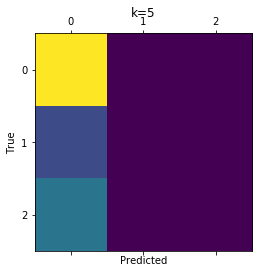

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



X = my_dataset[['How many people do you follow on social media?','Concerned about life (a) or goes too easy on life (b).']]
Y = my_dataset['Do you feel yourself depressed in a hostile situation?']
#plt.scatter(X,Y)
#plt.show()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
#print(len(X_test))
clf = KNeighborsClassifier(n_neighbors=5)
#clf = LinearRegression()

clf.fit(X_train, Y_train.astype(int))
yPred=clf.predict(X_test)
acc=accuracy_score(Y_test.astype(int), yPred.astype(int))*100
print('Accuracy with 5 neighbours: ',acc)
#plt.scatter(Y_test,yPred)
#plt.show()

#plt.boxplot(Y_test)
#plt.show()

##################
cm = confusion_matrix(Y_test.astype(int), yPred.astype(int))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("k=5")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 


Accuracy with 6 neighbours:  54.285714285714285
[[18  0  0  0]
 [ 6  1  0  0]
 [ 9  0  0  0]
 [ 1  0  0  0]]


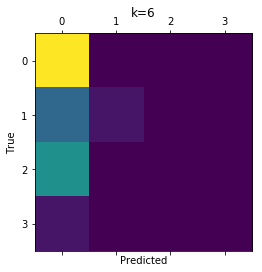

In [262]:
X = my_dataset[['CGPA','Do you feel confident when you start any project?']]
Y = my_dataset['Do you feel low seeing other people\'s achievement on social media']
#plt.scatter(X,Y)
#plt.show()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=1)
#print(len(X_test))
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, Y_train.astype(int))
yPred=clf.predict(X_test)
acc=accuracy_score(Y_test.astype(int), yPred.astype(int))*100
print('Accuracy with 6 neighbours: ',acc)
cm = confusion_matrix(Y_test.astype(int), yPred.astype(int))
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("k=6")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()  



In [ ]:
my_dataset